Running Euler's Method...
Running 2nd-Order Runge-Kutta (Midpoint Method)...
Running 4th-Order Runge-Kutta...
Running SciPy's solve_ivp...
Plotting results...

--- Final Values at t=10 ---
Analytical Solution: 0.000045
Euler's Method:      0.000000
RK2 (Midpoint) Method: 0.000977
RK4 Method:            0.000055
SciPy solve_ivp:       0.000046


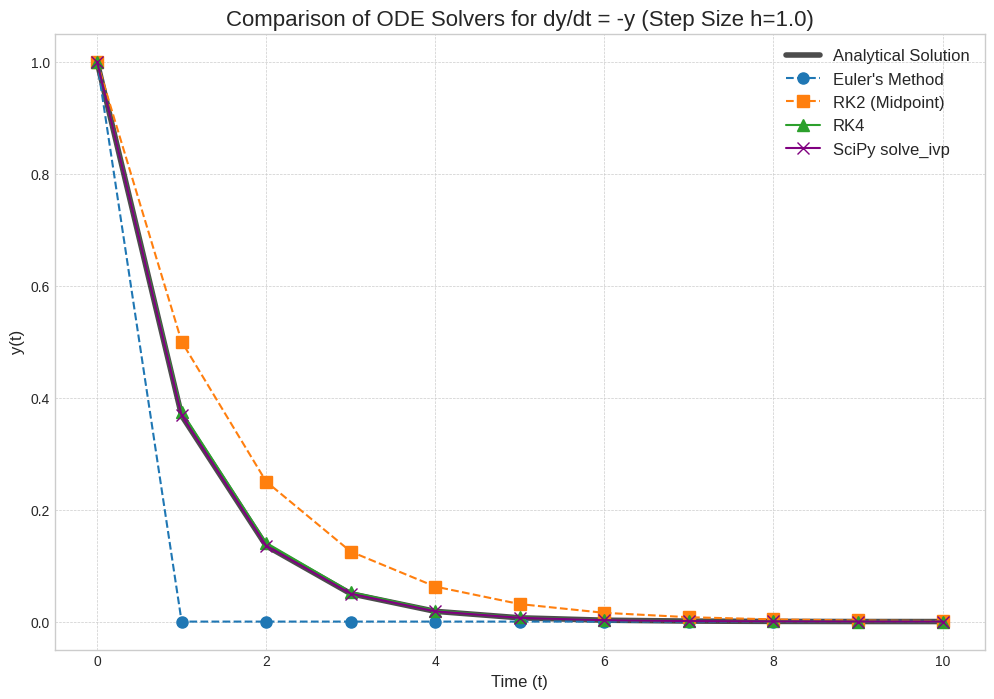

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 1. Define the Ordinary Differential Equation (ODE) ---
# We'll use a simple first-order ODE for demonstration purposes:
# dy/dt = -y
# The analytical solution is y(t) = y0 * exp(-t)
# This allows us to easily check the accuracy of our numerical methods.

def model(t, y):
    """
    Defines the ODE dy/dt = f(t, y).
    Args:
        t (float): The current time.
        y (float): The current value of the dependent variable.
    Returns:
        float: The derivative of y with respect to t.
    """
    return -y

# --- 2. Initial Conditions and Simulation Parameters ---
y0 = [1.0]      # Initial value of y at t=0
t_span = (0, 10) # Time interval for the solution [t_start, t_end]
dt = 1.0         # Step size for the numerical methods

# Create the time points for our numerical solutions
t_points = np.arange(t_span[0], t_span[1] + dt, dt)
n_steps = len(t_points)

# --- 3. Implementation of Numerical Methods ---

def euler_method(f, y0, t_points):
    """
    Solves a first-order ODE using Euler's method.

    Formula: y_{n+1} = y_n + h * f(t_n, y_n)

    Args:
        f (callable): The function defining the ODE, f(t, y).
        y0 (list or np.array): The initial condition for y.
        t_points (np.array): The array of time points to solve for.
    Returns:
        np.array: The solution y(t) at each time point.
    """
    print("Running Euler's Method...")
    y = np.zeros(len(t_points))
    y[0] = y0[0]
    h = t_points[1] - t_points[0] # Calculate step size
    for i in range(len(t_points) - 1):
        y[i+1] = y[i] + h * f(t_points[i], y[i])
    return y

def runge_kutta_2(f, y0, t_points):
    """
    Solves a first-order ODE using the 2nd-order Runge-Kutta method (Midpoint Method).

    Formula:
    k1 = h * f(t_n, y_n)
    k2 = h * f(t_n + h/2, y_n + k1/2)
    y_{n+1} = y_n + k2

    Args:
        f (callable): The function defining the ODE, f(t, y).
        y0 (list or np.array): The initial condition for y.
        t_points (np.array): The array of time points to solve for.
    Returns:
        np.array: The solution y(t) at each time point.
    """
    print("Running 2nd-Order Runge-Kutta (Midpoint Method)...")
    y = np.zeros(len(t_points))
    y[0] = y0[0]
    h = t_points[1] - t_points[0]
    for i in range(len(t_points) - 1):
        k1 = h * f(t_points[i], y[i])
        k2 = h * f(t_points[i] + h/2, y[i] + k1/2)
        y[i+1] = y[i] + k2
    return y

def runge_kutta_4(f, y0, t_points):
    """
    Solves a first-order ODE using the classic 4th-order Runge-Kutta method.

    Formula:
    k1 = h * f(t_n, y_n)
    k2 = h * f(t_n + h/2, y_n + k1/2)
    k3 = h * f(t_n + h/2, y_n + k2/2)
    k4 = h * f(t_n + h, y_n + k3)
    y_{n+1} = y_n + (k1 + 2*k2 + 2*k3 + k4) / 6

    Args:
        f (callable): The function defining the ODE, f(t, y).
        y0 (list or np.array): The initial condition for y.
        t_points (np.array): The array of time points to solve for.
    Returns:
        np.array: The solution y(t) at each time point.
    """
    print("Running 4th-Order Runge-Kutta...")
    y = np.zeros(len(t_points))
    y[0] = y0[0]
    h = t_points[1] - t_points[0]
    for i in range(len(t_points) - 1):
        k1 = h * f(t_points[i], y[i])
        k2 = h * f(t_points[i] + h/2, y[i] + k1/2)
        k3 = h * f(t_points[i] + h/2, y[i] + k2/2)
        k4 = h * f(t_points[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# --- 4. Compute the Solutions ---

# --- Numerical Solutions ---
y_euler = euler_method(model, y0, t_points)
y_rk2 = runge_kutta_2(model, y0, t_points)
y_rk4 = runge_kutta_4(model, y0, t_points)

# --- SciPy's High-Accuracy Solution ---
# solve_ivp is a powerful library function that often uses adaptive step sizes
# and higher-order methods. We use it here as a reference for a very accurate solution.
print("Running SciPy's solve_ivp...")
sol_scipy = solve_ivp(model, t_span, y0, dense_output=True, t_eval=t_points)

# --- Analytical Solution ---
# For our simple ODE, we can calculate the true solution to compare against.
y_analytical = y0[0] * np.exp(-t_points)


# --- 5. Visualize the Results ---
print("Plotting results...")
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t_points, y_analytical, 'k-', label='Analytical Solution', linewidth=4, alpha=0.7)
ax.plot(t_points, y_euler, 'o--', label='Euler\'s Method', markersize=8)
ax.plot(t_points, y_rk2, 's--', label='RK2 (Midpoint)', markersize=8)
ax.plot(t_points, y_rk4, '^-', label='RK4', markersize=8)
ax.plot(sol_scipy.t, sol_scipy.y[0], 'x-', label='SciPy solve_ivp', markersize=8, color='purple')

ax.set_title(f'Comparison of ODE Solvers for dy/dt = -y (Step Size h={dt})', fontsize=16)
ax.set_xlabel('Time (t)', fontsize=12)
ax.set_ylabel('y(t)', fontsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Print final values for quantitative comparison
print("\n--- Final Values at t=10 ---")
print(f"Analytical Solution: {y_analytical[-1]:.6f}")
print(f"Euler's Method:      {y_euler[-1]:.6f}")
print(f"RK2 (Midpoint) Method: {y_rk2[-1]:.6f}")
print(f"RK4 Method:            {y_rk4[-1]:.6f}")
print(f"SciPy solve_ivp:       {sol_scipy.y[0, -1]:.6f}")


plt.show()



Generating high-accuracy reference solution...

--- Benchmark Results ---
Step size (dt): 0.01
Time points: 2501
-----------------------------------
Method             | Execution Time (s)   | Mean Squared Error  
------------------------------------------------------------
Euler              | 0.090023             | 141.705094          
RK2                | 0.199225             | 46.562030           
RK4                | 0.251736             | 21.712205           
SciPy solve_ivp    | 0.158156             | 0.000000            


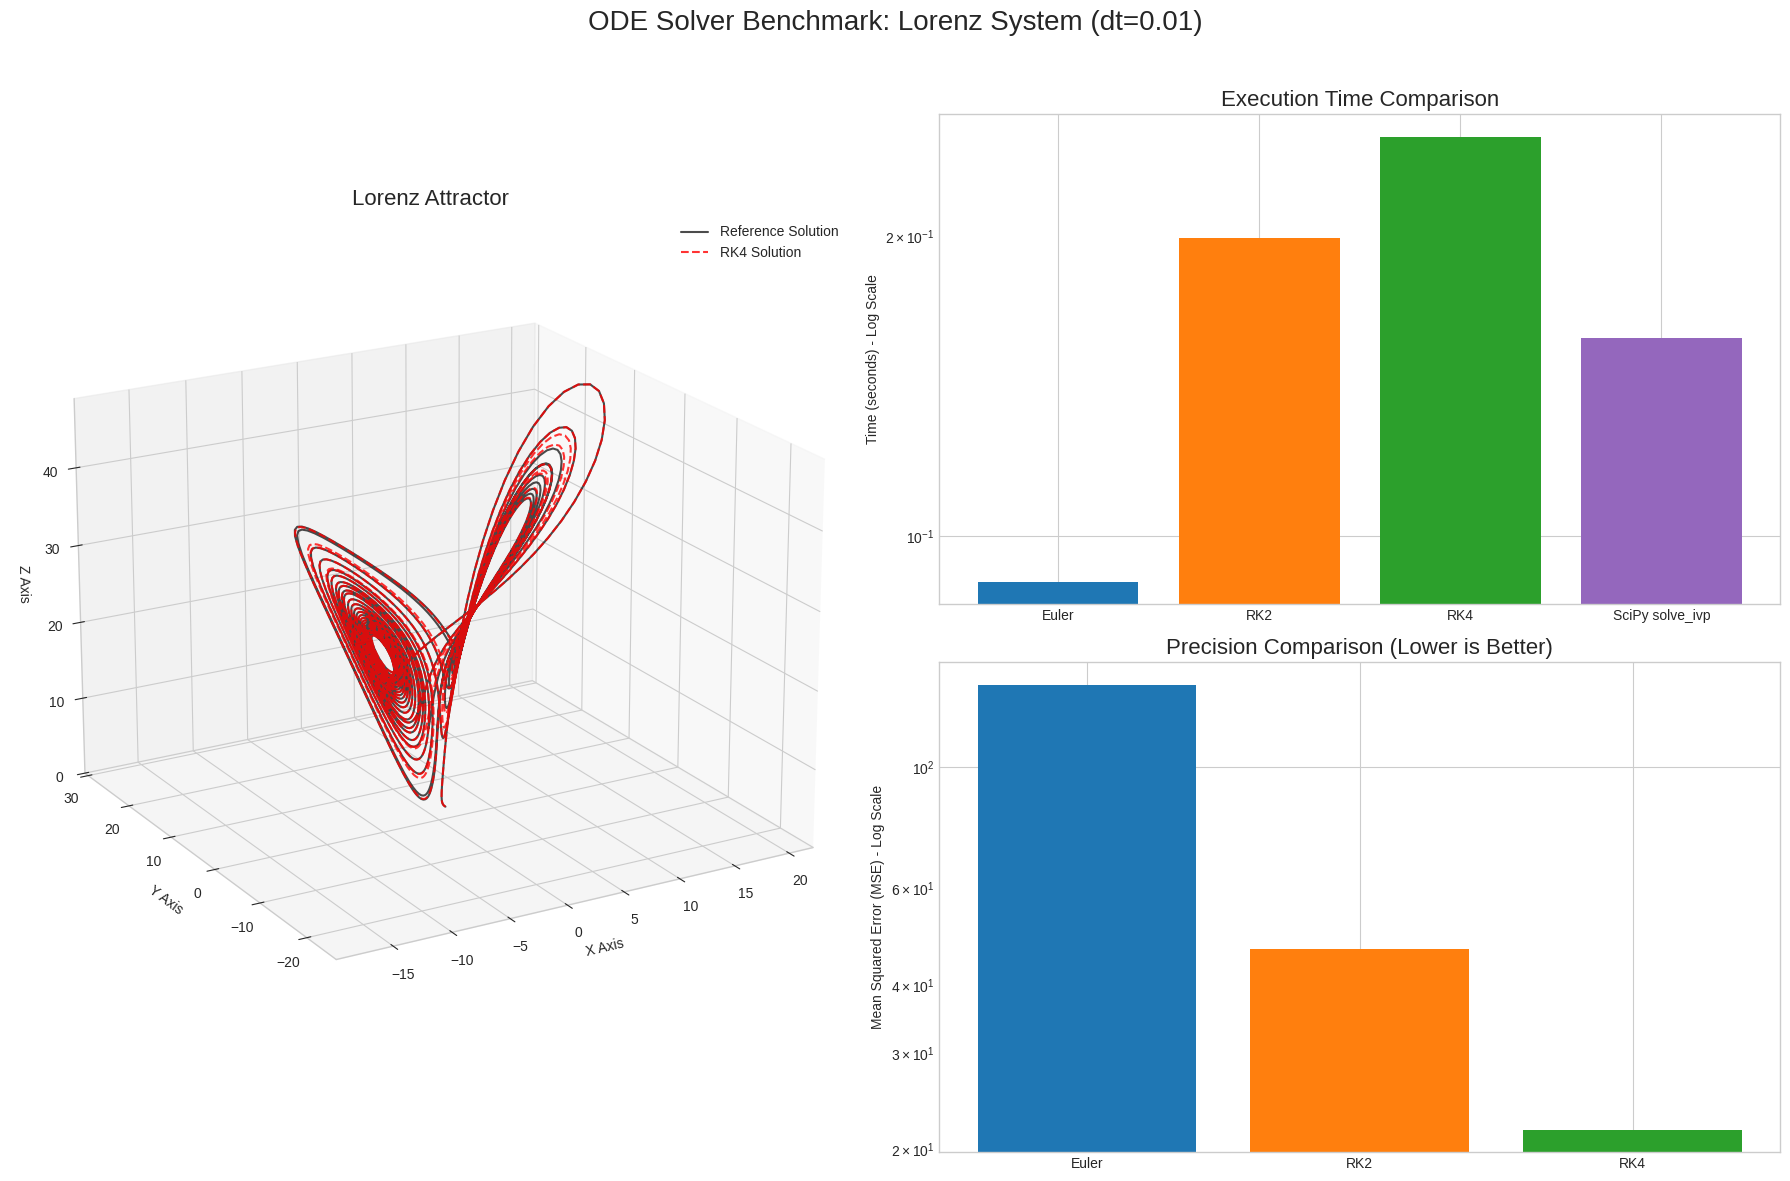

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# --- 1. Define the Ordinary Differential Equation (ODE) System ---
# We will use the Lorenz system, a classic example of a chaotic system.
# dx/dt = sigma * (y - x)
# dy/dt = x * (rho - z) - y
# dz/dt = x * y - beta * z

def lorenz_system(t, y, sigma=10.0, rho=28.0, beta=8.0/3.0):
    """
    Defines the Lorenz system of ODEs.
    Args:
        t (float): The current time (not used in this autonomous system, but required by solvers).
        y (list or np.array): A list or array [x, y, z] of the current state.
        sigma, rho, beta (float): Parameters of the Lorenz system.
    Returns:
        np.array: The derivatives [dx/dt, dy/dt, dz/dt].
    """
    x, y, z = y
    dydt = [
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ]
    return np.array(dydt)

# --- 2. Initial Conditions and Simulation Parameters ---
y0 = [1.0, 1.0, 1.0] # Initial state [x0, y0, z0]
t_span = (0, 25)     # Time interval for the solution
dt = 0.01            # Step size for our numerical methods

# Create the time points for our numerical solutions
t_points = np.arange(t_span[0], t_span[1] + dt, dt)

# --- 3. Update Numerical Methods to Handle Systems (Vectors) ---
# The logic is identical, but now we use NumPy for vector arithmetic.

def euler_method_system(f, y0, t_points):
    """Solves a system of ODEs using Euler's method."""
    y = np.zeros((len(t_points), len(y0)))
    y[0, :] = y0
    h = t_points[1] - t_points[0]
    for i in range(len(t_points) - 1):
        y[i+1, :] = y[i, :] + h * f(t_points[i], y[i, :])
    return y

def runge_kutta_2_system(f, y0, t_points):
    """Solves a system of ODEs using the 2nd-order Runge-Kutta method."""
    y = np.zeros((len(t_points), len(y0)))
    y[0, :] = y0
    h = t_points[1] - t_points[0]
    for i in range(len(t_points) - 1):
        k1 = h * f(t_points[i], y[i, :])
        k2 = h * f(t_points[i] + h/2, y[i, :] + k1/2)
        y[i+1, :] = y[i, :] + k2
    return y

def runge_kutta_4_system(f, y0, t_points):
    """Solves a system of ODEs using the 4th-order Runge-Kutta method."""
    y = np.zeros((len(t_points), len(y0)))
    y[0, :] = y0
    h = t_points[1] - t_points[0]
    for i in range(len(t_points) - 1):
        k1 = h * f(t_points[i], y[i, :])
        k2 = h * f(t_points[i] + h/2, y[i, :] + k1/2)
        k3 = h * f(t_points[i] + h/2, y[i, :] + k2/2)
        k4 = h * f(t_points[i] + h, y[i, :] + k3)
        y[i+1, :] = y[i, :] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# --- 4. Benchmarking: Speed and Precision ---

# First, generate a high-precision reference solution with solve_ivp
print("Generating high-accuracy reference solution...")
ref_sol = solve_ivp(
    lorenz_system, t_span, y0,
    dense_output=True, t_eval=t_points,
    rtol=1e-8, atol=1e-8 # Strict error tolerances
)
y_ref = ref_sol.y.T # Transpose to match our format (steps, vars)

# Dictionary to store results
results = {}

# --- Euler's Method ---
start_time = time.time()
y_euler = euler_method_system(lorenz_system, y0, t_points)
end_time = time.time()
mse_euler = np.mean((y_euler - y_ref)**2)
results['Euler'] = {'time': end_time - start_time, 'mse': mse_euler}

# --- RK2 Method ---
start_time = time.time()
y_rk2 = runge_kutta_2_system(lorenz_system, y0, t_points)
end_time = time.time()
mse_rk2 = np.mean((y_rk2 - y_ref)**2)
results['RK2'] = {'time': end_time - start_time, 'mse': mse_rk2}

# --- RK4 Method ---
start_time = time.time()
y_rk4 = runge_kutta_4_system(lorenz_system, y0, t_points)
end_time = time.time()
mse_rk4 = np.mean((y_rk4 - y_ref)**2)
results['RK4'] = {'time': end_time - start_time, 'mse': mse_rk4}

# --- SciPy solve_ivp (default settings) ---
start_time = time.time()
solve_ivp(lorenz_system, t_span, y0, t_eval=t_points) # No dense output needed here
end_time = time.time()
# Note: We can't easily calculate MSE for solve_ivp against itself,
# but we measure its time as a benchmark.
results['SciPy solve_ivp'] = {'time': end_time - start_time, 'mse': 0}


# --- 5. Print and Visualize the Results ---

print("\n--- Benchmark Results ---")
print(f"Step size (dt): {dt}")
print(f"Time points: {len(t_points)}")
print("-" * 35)
print(f"{'Method':<18} | {'Execution Time (s)':<20} | {'Mean Squared Error':<20}")
print("-" * 60)
for method, data in results.items():
    print(f"{method:<18} | {data['time']:<20.6f} | {data['mse']:<20.6f}")

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(18, 12))
fig.suptitle(f'ODE Solver Benchmark: Lorenz System (dt={dt})', fontsize=20)

# 1. 3D Attractor Plot
ax1 = fig.add_subplot(2, 2, (1, 3), projection='3d')
ax1.plot(y_ref[:, 0], y_ref[:, 1], y_ref[:, 2], label='Reference Solution', color='black', alpha=0.7)
ax1.plot(y_rk4[:, 0], y_rk4[:, 1], y_rk4[:, 2], 'r--', label='RK4 Solution', alpha=0.8)
ax1.set_title('Lorenz Attractor', fontsize=16)
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.legend()
ax1.view_init(elev=20, azim=-120)

# 2. Execution Time Bar Chart
ax2 = fig.add_subplot(2, 2, 2)
methods = list(results.keys())
times = [d['time'] for d in results.values()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
ax2.bar(methods, times, color=colors)
ax2.set_title('Execution Time Comparison', fontsize=16)
ax2.set_ylabel('Time (seconds)')
ax2.set_yscale('log')
ax2.set_ylabel('Time (seconds) - Log Scale')


# 3. Precision (MSE) Bar Chart
ax3 = fig.add_subplot(2, 2, 4)
# Exclude SciPy as its MSE is 0 by definition here
methods_mse = methods[:-1]
mses = [results[m]['mse'] for m in methods_mse]
colors_mse = colors[:-1]
ax3.bar(methods_mse, mses, color=colors_mse)
ax3.set_title('Precision Comparison (Lower is Better)', fontsize=16)
ax3.set_ylabel('Mean Squared Error (MSE) - Log Scale')
ax3.set_yscale('log')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
